USPORF Paper

- Unsupervised random forest algorithm is based on the original Random Forest algorithm with a few key distinctions. 

1. URerf uses a new splitting criteria, Fast-BIC, that efficiently and exactly computes an approximate Bayesian Information Criterion for a Guassian Mixture model in one dimension. 

2. Use the term randomer to label our technique, as our splitting methods are based on random sparse linear combinations of features to strengthen each tree.

3. correctly implement a previously proposed method for generating proximity matrices for random forests

USPORF is really good at learning geodesic distances in linear and nonlinear dimensions with noise. It's competitors fail when there's noise


In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest


In [4]:
# Load dataset
iris = datasets.load_iris()

In [5]:
X = iris.data


In [6]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.   0.09 0.07 ... 0.   0.   0.  ]
 [0.06 1.   0.23 ... 0.   0.   0.  ]
 [0.05 0.11 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.04 0.07]
 [0.   0.   0.   ... 0.04 1.   0.02]
 [0.   0.   0.   ... 0.12 0.01 1.  ]]


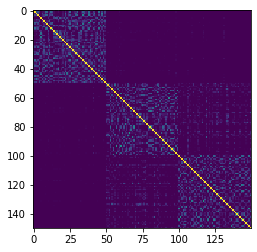

In [7]:
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

sim_mat is a distance matrix, which (ostensibly) describes the distance between points on some low dimensional manifold (see manifold learning). This distance can be more descriptive than just pure Euclidean distance between points. 

In [9]:
from sklearn.cluster import AgglomerativeClustering
## can use alternative methods of clustering here
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 0 0 2 0 2 2 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Adjusted Rand Score: 0.6356968215158925


**Adjusted Rand Score**
Rand index adjusted for chance.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

**ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)**

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

- source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html